# $ Wrangle$ $Linear$ $Regression$

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import wrangle as w

Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [2]:
df = w.get_zillow_data()

In [ ]:
df

In [ ]:
df = w.wrangle_single_family_residential()

In [8]:
columns = df.columns.to_list()

In [ ]:
# squl query for acquisition
sql_query =  """
            SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
            FROM properties_2017
            Where propertylandusetypeid = 261;
        """
    # Acquisition
df = pd.read_sql(sql_query, env.get_connection('zillow'))

In [ ]:
df.sample(20)

<div class="alert alert-info"> There is 2152863 rows × 7 columns.
I can see NaN in calculatedfinishedsquarefeet,yearbuilt,taxamount

In [3]:
def plot_boxplot(df,feature):
    df.boxplot(column=[feature])
    plt.grid(False)
    Q1 = df[feature].quantile(.25)
    Q2 = df[feature].quantile(.5)
    Q3 = df[feature].quantile(.75)
    Q4 = df[feature].quantile(1)
    IQR =  Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print ('Q1:', Q1)
    print ('Q2:', Q2)
    print ('Q3:', Q3)
    print ('Q4:', Q4)
    print ('IQR', IQR)
    print('lower bound:',lower_bound)
    print('upper bound:' ,upper_bound)
    plt.show()

In [9]:
columns

['bedroomcnt',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'taxvaluedollarcnt',
 'yearbuilt',
 'taxamount',
 'fips']

In [ ]:
for i in columns:
    print(i)
    plot_boxplot(df, i)

In [ ]:
# bathrooms,squarefeet, taxamount

In [19]:
df = w.remove_outliers(df,['calculatedfinishedsquarefeet','taxamount','taxvaluedollarcnt'])

bedroomcnt
Q1: 3.0
Q2: 3.0
Q3: 4.0
Q4: 5.0
IQR 1.0
lower bound: 1.5
upper bound: 5.5


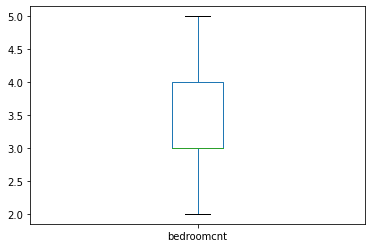

bathroomcnt
Q1: 2.0
Q2: 2.0
Q3: 2.5
Q4: 3.0
IQR 0.5
lower bound: 1.25
upper bound: 3.25


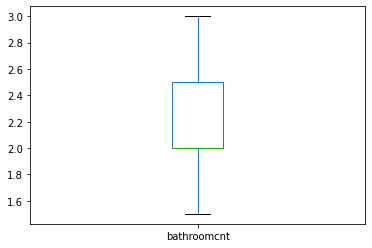

calculatedfinishedsquarefeet
Q1: 1389.0
Q2: 1672.0
Q3: 2082.0
Q4: 3292.0
IQR 693.0
lower bound: 349.5
upper bound: 3121.5


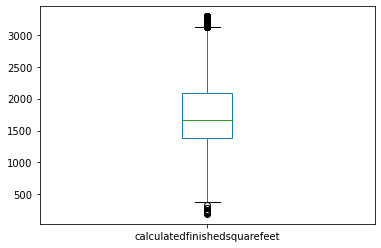

taxvaluedollarcnt
Q1: 193333.0
Q2: 321886.0
Q3: 480212.0
Q4: 982250.0
IQR 286879.0
lower bound: -236985.5
upper bound: 910530.5


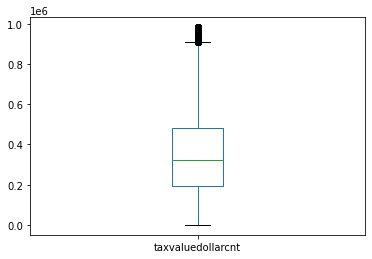

yearbuilt
Q1: 1954.0
Q2: 1962.0
Q3: 1976.0
Q4: 2016.0
IQR 22.0
lower bound: 1921.0
upper bound: 2009.0


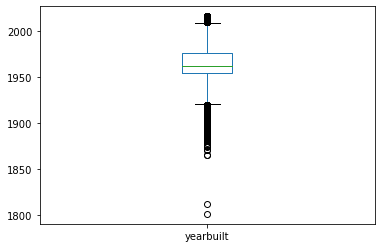

taxamount
Q1: 2593.68
Q2: 4013.46
Q3: 5791.305
Q4: 11390.03
IQR 3197.6250000000005
lower bound: -2202.757500000001
upper bound: 10587.7425


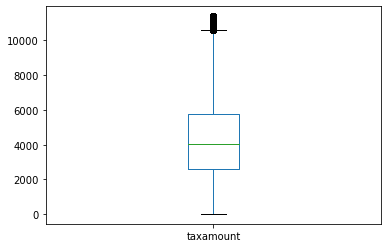

fips
Q1: 6037.0
Q2: 6037.0
Q3: 6059.0
Q4: 6111.0
IQR 22.0
lower bound: 6004.0
upper bound: 6092.0


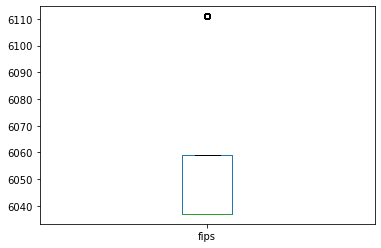

In [20]:
for i in columns:
    print(i)
    plot_boxplot(df, i)

### Look into bedroom count

In [ ]:
df.bedroomcnt.max()

In [ ]:
df[df.bedroomcnt > df.bedroomcnt.quantile(.75)]

In [ ]:
plot_boxplot(df,'bedroomcnt')

In [ ]:
df.bedroomcnt.value_counts( sort=True, bins = 5)

In [ ]:
(6)/(len(df))* 100,(75 +6)/(2152852)* 100

<div class="alert alert-info"> 
6 rows are 15 bedrooms and above that is 0.0003% of total data
    
75 + 6 rows are 10 bedrooms and above that is 0.004% of total data
    
If I where to remove outliers I might set parameters for outliers to be 15+ (revmoves 6 rows) or 10+(removes 81 rows) 

In [ ]:
# bedrooms with more than 10 rooms
df[df.bedroomcnt>10]

### Look into bathroom count

In [ ]:
plot_boxplot(df,'bathroomcnt')

In [ ]:
df.bathroomcnt.value_counts().sort_values

In [ ]:
df.bathroomcnt.value_counts(normalize=False, bins =16)

In [ ]:
51/2152852 *100

<div class="alert alert-info"> ????? not sure on this one
21 rows are 16 bathrooms and above that 0.0007% of total data
    
51 rows are 14 bath rooms and above that 0.002% of total data

    
If I where to remove outliers I might set parameters for outliers to be 19.5+ (removes 21 rows) or 14 (removes 76  rows) 

In [ ]:
# bathrooms with more than 10 rooms
df.bathroomcnt[df.bathroomcnt>16].value_counts(bins=1)

In [ ]:
def outliers (df,feature):
    Q1 = df[feature].quantile(.25)
    Q3 = df[feature].quantile(.75)
    IQR =  Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    ls = df[(df[feature]<lower_bound) | (df[feature] > upper_bound)]
    return ls

In [ ]:
df[df.yearbuilt.isnull()]

<div class="alert alert-info"> 
Many values that have a year built NaN also have a bedroomcnt = 0, bathroomcnt = 0 and squarefeet NaN,
     9337 rows 

In [ ]:
df[(df.yearbuilt.isnull()) & (df.bathroomcnt.isnull())& (df.calculatedfinishedsquarefeet.isnull())]

<div class="alert alert-info"> 
There is three rows that have NaN in yearbuilt, bathrommcnt, bedroomcnt. and squarefeet

In [ ]:
outliers_bathroom = outliers(df, 'bathroomcnt') 

In [ ]:
outliers_bedroom = outliers(df, 'bedroomcnt') 

In [ ]:
outliers_squarefeet = outliers(df, 'calculatedfinishedsquarefeet') 

In [ ]:
outliers_bathroom = outliers(df, 'bathroomcnt') 

In [ ]:
plot_boxplot(df,'bathroomcnt')

In [ ]:
# to show all value counts in info
df.info(show_counts=  True)

info() did not mark the null values. All columns are dataType- float64

In [ ]:
df.isnull().any()

In [ ]:
df.isna().sum()

<div class="alert alert-info">
Null values
    
* 11 values in bedroomcnt 
* 11 values in bathroomcnt
* 8484 values in calculatedfinishedsquarefeet
* 493 values in taxvaluedollarcnt
* 9337 values in yearbuilt 
* 4442 values in taxamount

No null values in fips

In [ ]:
df.nunique()

In [ ]:
df.size, df.shape

In [ ]:
df.describe().T

<div class="alert alert-info">
    
Bedroom range 0 to 25
    
bathroom range 0 to 32
    
square feet range 1 to 952576.00
    
Year built has a range from 1801 to 2016
    
Tax amount has a range from 1.85 to 1337755.86
 

In [ ]:
df = df.dropna()

In [ ]:
df.shape

In [ ]:
2140235-2152863

<div class="alert alert-info">
If all null values are dropped we lose 12628 rows

In [ ]:
def get_zillow_data():
        ''' Acquire Zillow data using properties_2017 table from Code up Data Base. Columns bedroomcnt, 
            bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips 
        '''
   
    # sql query for acquisition
        sql_query = """
        SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
        FROM properties_2017
        Where propertylandusetypeid = 261;
        """
    # Acquisition
        df = pd.read_sql(sql_query, env.get_connection('zillow'))

In [ ]:
def wrangle_single_family_residential():
    '''Wrangle_single_family_residential checks to see if the csv or zillow data exits. If it does not
        it will call for the data and save a csv file. It will return a dataframe that had drop all nulls.
    '''
    # obtain csv file
    if os.path.isfile('zillow.csv'):
        
        # If csv file exists read in data from csv file.
        df = pd.read_csv('zillow.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame
        df = get_zillow_data()
        
        # Cache data
        df.to_csv('zillow.csv')
    # replace blank spaces and special characters
    df = df.replace(r'^\s*$', np.nan, regex = True)
    
    df = df.dropna()
    return df

In [ ]:
df = w. wrangle_single_family_residential()

In [ ]:
df

In [ ]:
df.columns

In [ ]:
plt.figure(figsize=(25, 5))

for i, col in enumerate(df):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1
    
    # Create subplot.
    # plt.subplot(row X col, where?)
    plt.subplot(1,7,plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    df.boxplot(column=[col])
    
    # Hide gridlines.
    plt.grid(False)

In [ ]:
df.describe().T

In [ ]:
df.shape